In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("google_play_store_dataset.csv")
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [28]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [29]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [30]:
data.shape

(10841, 13)

In [31]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [32]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

C:\Users\divis\AppData\Local\Temp\ipykernel_27280\1606799506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


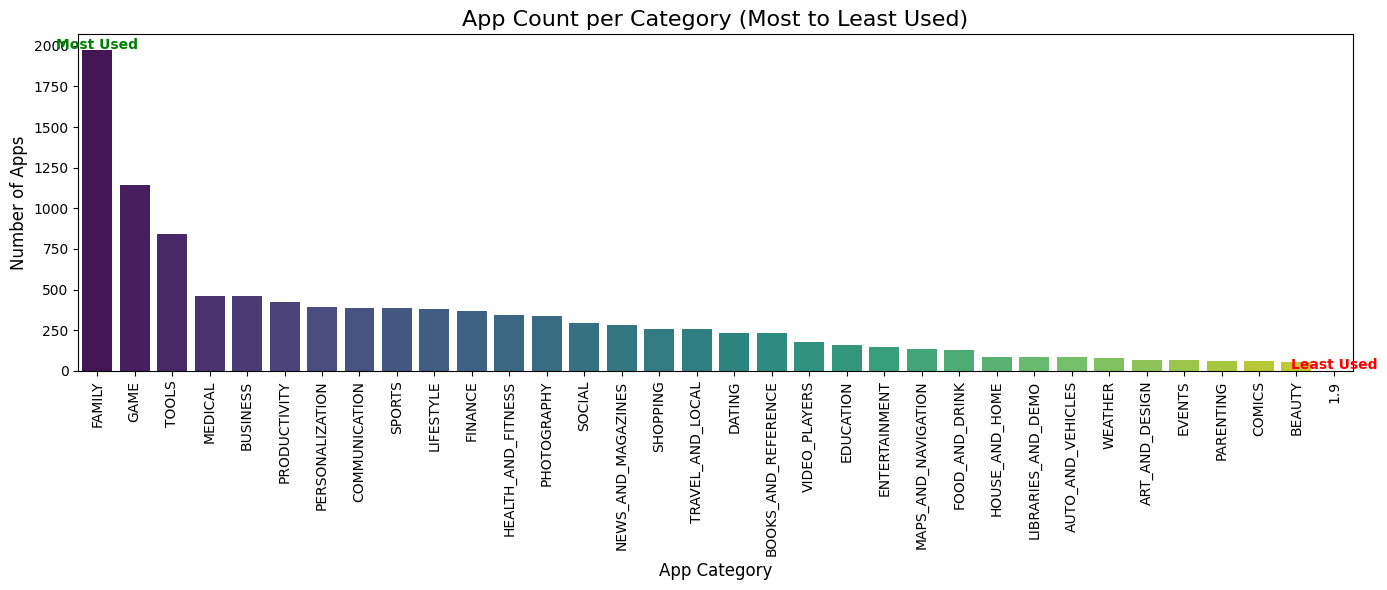

In [33]:
category_counts = data['Category'].value_counts()

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Highlight the title and labels
plt.title('App Count per Category (Most to Least Used)', fontsize=16)
plt.xlabel('App Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

# Annotate the highest and lowest used categories
max_cat = category_counts.idxmax()
min_cat = category_counts.idxmin()

plt.text(x=category_counts.index.tolist().index(max_cat),
         y=category_counts[max_cat] + 10,
         s='Most Used',
         ha='center',
         color='green',
         fontweight='bold')

plt.text(x=category_counts.index.tolist().index(min_cat),
         y=category_counts[min_cat] + 10,
         s='Least Used',
         ha='center',
         color='red',
         fontweight='bold')

plt.tight_layout()
plt.show()


In [34]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [35]:
data['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [36]:
app_count = data['App'].value_counts()

dup_app = app_count[app_count > 1]
print(dup_app)

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64


In [37]:
data = data.loc[data.groupby('App')['Reviews'].idxmax()]

In [38]:
data.loc[10472] = data.loc[10472].shift()
data['App'].loc[10472] = data['Category'].loc[10472]
data['Category'].loc[10472] = np.nan
data.loc[10472]

C:\Users\divis\AppData\Local\Temp\ipykernel_27280\1316984169.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[10472] = data.loc[10472].shift()
C:\Users\divis\AppData\Local\Temp\ipykernel_27280\1316984169.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [39]:
data['Rating'].unique()

array([nan, 4.5, 3.5, 4.7, 4.4, 4.6, 4.0, 4.1, 4.2, 3.7, 3.8, 4.8, 3.0,
       4.3, 5.0, 3.1, 3.9, 2.9, 2.3, 1.7, 3.2, 3.4, 3.3, 3.6, 1.6, 2.8,
       2.0, 4.9, 2.4, 2.1, 2.7, 2.2, 2.6, 2.5, 1.4, 1.0, 1.9, 1.8, 1.5,
       1.2, '1.9'], dtype=object)

In [40]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

In [41]:
data['Reviews'].unique()

array(['27', '40467', '115', ..., '718', '22098', '11661'], dtype=object)

In [42]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Reviews'].dtype


dtype('float64')

In [43]:
data['Size'].unique()

array(['3.6M', '22M', '9.1M', '203k', '53M', '14M', '41M', '3.8M', '48M',
       '3.5M', '1.6M', '5.0M', '25M', '20M', '15M', '29M', '1.4M', '26M',
       '10M', '31M', '13M', 'Varies with device', '2.0M', '2.4M', '3.7M',
       '38M', '39M', '6.3M', '5.1M', '42M', '8.1M', '30M', '32M', '40M',
       '7.6M', '371k', '17M', '24M', '7.4M', '37M', '69M', '28M', '21M',
       '7.3M', '56M', '2.5M', '2.3M', '4.1M', '243k', '11M', '2.9M',
       '54M', '8.4M', '8.0M', '6.8M', '52M', '6.1M', '9.0M', '1.2M',
       '4.3M', '23M', '67M', '16M', '68M', '8.8M', '19M', '239k', '4.4M',
       '33M', '2.1M', '3.0M', '5.7M', '18M', '8.2M', '35M', '91M', '1.8M',
       '3.2M', '3.1M', '9.7M', '1.7M', '3.4M', '27M', '4.2M', '7.7M',
       '4.5M', '45M', '2.8M', '78k', '6.6M', '66M', '12M', '4.0M', '317k',
       '9.2M', '902k', '924k', '62M', '2.7M', '47M', '8.7M', '81k', '59M',
       '86M', '99M', '3.3M', '5.3M', '45k', '169k', '3.9M', '475k',
       '7.0M', '5.8M', '71M', '72M', '46M', '9.9M', '96M'

In [44]:
data['Size'] = data.Size.replace("Varies with device",np.nan)

In [45]:
def convert_size(value):
    if pd.isna(value):  # Check for NaN using Pandas
        return np.nan

    value = str(value)  # Ensure value is a string

    if 'M' in value:
        return float(value.replace('M', '')) * 1024
    elif 'k' in value:
        return float(value.replace('k', ''))
    else:
        return np.nan  # In case the string doesn't match the condition


In [46]:
data['Size'].dtype

dtype('O')

In [47]:
data['Installs'].unique()

array(['500+', '1,000,000+', '10,000+', '100+', '100,000+', '500,000+',
       '10,000,000+', '5,000+', '50,000+', '5+', '1,000+', '10+',
       '50,000,000+', '100,000,000+', '5,000,000+', '50+', '0+', '1+',
       '500,000,000+', '0', '1,000,000,000+'], dtype=object)

In [48]:
data['Installs'] = data.Installs.str.replace(",","")
data['Installs'] = data.Installs.str.replace("+","")
data['Installs'] = data.Installs.replace("Free",np.nan)
data['Installs'] = data['Installs'].astype(float)
data['Installs'].dtype

dtype('float64')

In [49]:
install_counts = data['Installs'].value_counts()

# Display the results
print("Unique Install Values and Their Frequencies:")
print(install_counts)

Unique Install Values and Their Frequencies:
Installs
1.000000e+06    1418
1.000000e+05    1113
1.000000e+04    1030
1.000000e+07     934
1.000000e+03     889
1.000000e+02     710
5.000000e+06     608
5.000000e+05     505
5.000000e+04     469
5.000000e+03     468
1.000000e+01     385
5.000000e+02     328
5.000000e+01     204
5.000000e+07     203
1.000000e+08     188
5.000000e+00      82
1.000000e+00      67
5.000000e+08      24
1.000000e+09      20
0.000000e+00      15
Name: count, dtype: int64


In [50]:
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [51]:
data[data['Type']=='Paid']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10.0,3.8M,100.0,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up
8219,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70.0,3.5M,500.0,Paid,$0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up
6760,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47.0,1.4M,1000.0,Paid,$3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up
7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6.0,3.5M,100.0,Paid,$1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,1000.0,Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,weather HD,PERSONALIZATION,4.0,1546.0,4.5M,10000.0,Paid,$1.99,Everyone,Personalization,"February 26, 2014",3.1,2.1 and up
5832,¡Ay Caramba!,FAMILY,NaN,0.0,549k,1.0,Paid,$1.99,Everyone,Education,"June 13, 2014",1.2,3.0 and up
9828,Égalité et Réconciliation,NEWS_AND_MAGAZINES,4.9,58.0,3.8M,500.0,Paid,$2.99,Everyone,News & Magazines,"May 26, 2018",1.1.1,5.0 and up
7183,Билеты ПДД CD 2019 PRO,AUTO_AND_VEHICLES,NaN,21.0,16M,100.0,Paid,$1.49,Everyone,Auto & Vehicles,"July 27, 2018",1.49,4.0 and up


In [52]:
f = 0
for i in data['Type']:
    if(i == 'Free'):
        f += 1
print("There are total", f, "free and", end=" ")

p = 0
for i in data['Type']:
    if(i == 'Paid'):
        p += 1
print("and", p, "paid applications")

There are total 8903 free and and 756 paid applications


In [53]:
data['Price'].unique()

array(['0', '$1.49', '$0.99', '$3.08', '$16.99', '$9.99', '$33.99',
       '$2.00', '$3.04', '$8.99', '$1.99', '$2.49', '$5.00', '$4.99',
       '$2.99', '$7.99', '$29.99', '$3.99', '$19.90', '$2.60', '$6.49',
       '$1.29', '$24.99', '$13.99', '$4.49', '$14.99', '$1.50', '$1.00',
       '$3.90', '$1.75', '$5.99', '$109.99', '$4.80', '$3.49', '$11.99',
       '$2.59', '$14.00', '$10.99', '$5.49', '$6.99', '$3.95', '$12.99',
       '$7.49', '$19.99', '$3.28', '$46.99', '$28.99', '$200.00', '$3.61',
       '$4.77', '$394.99', '$30.99', '$3.88', '$25.99', '$8.49',
       '$399.99', '$389.99', '$37.99', '$18.99', '$379.99', '$299.99',
       '$400.00', '$1.26', '$15.46', '$39.99', '$74.99', '$89.99',
       '$1.61', '$1.59', '$9.00', '$15.99', '$1.70', '$3.02', '$4.60',
       '$10.00', '$1.76', '$4.84', '$4.85', '$4.59', '$2.95', '$17.99',
       '$1.97', '$79.99', '$2.90', '$1.04', '$2.56', '$2.50', '$19.40',
       '$1.96', '$154.99', '$4.29', '$1.20'], dtype=object)

In [54]:
data['Price'] = data.Price.str.replace("$","").astype(float)
data['Price'].dtype

dtype('float64')

In [55]:
data['Price'].unique()

array([  0.  ,   1.49,   0.99,   3.08,  16.99,   9.99,  33.99,   2.  ,
         3.04,   8.99,   1.99,   2.49,   5.  ,   4.99,   2.99,   7.99,
        29.99,   3.99,  19.9 ,   2.6 ,   6.49,   1.29,  24.99,  13.99,
         4.49,  14.99,   1.5 ,   1.  ,   3.9 ,   1.75,   5.99, 109.99,
         4.8 ,   3.49,  11.99,   2.59,  14.  ,  10.99,   5.49,   6.99,
         3.95,  12.99,   7.49,  19.99,   3.28,  46.99,  28.99, 200.  ,
         3.61,   4.77, 394.99,  30.99,   3.88,  25.99,   8.49, 399.99,
       389.99,  37.99,  18.99, 379.99, 299.99, 400.  ,   1.26,  15.46,
        39.99,  74.99,  89.99,   1.61,   1.59,   9.  ,  15.99,   1.7 ,
         3.02,   4.6 ,  10.  ,   1.76,   4.84,   4.85,   4.59,   2.95,
        17.99,   1.97,  79.99,   2.9 ,   1.04,   2.56,   2.5 ,  19.4 ,
         1.96, 154.99,   4.29,   1.2 ])

In [56]:
data['Content Rating'].unique()

array(['Everyone', 'Mature 17+', 'Everyone 10+', 'Teen', 'Unrated',
       'Adults only 18+'], dtype=object)

In [57]:
data[data['Content Rating'] == 'Unrated']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1.0,2.5M,500.0,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186.0,6.4M,50000.0,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [58]:
data['Genres'].unique()

array(['Sports', 'Social', 'Comics', 'Tools', 'Communication',
       'News & Magazines', 'Health & Fitness', 'Education',
       'Books & Reference', 'Puzzle', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Board', 'Finance', 'Action', 'Personalization',
       'Casual', 'Arcade', 'Photography', 'Travel & Local',
       'Entertainment', 'Dating', 'Productivity', 'Art & Design',
       'Simulation', 'Food & Drink', 'Video Players & Editors', 'Racing',
       'Adventure', 'House & Home', 'Maps & Navigation', 'Events',
       'Educational;Education', 'Education;Education', 'Casino', 'Card',
       'Auto & Vehicles', 'Weather', 'Beauty', 'Educational', 'Strategy',
       'Music', 'Libraries & Demo', 'Role Playing', 'Trivia',
       'Entertainment;Creativity', 'Parenting',
       'Casual;Action & Adventure', 'Board;Brain Games',
       'Parenting;Music & Video', 'Casual;Pretend Play',
       'Travel & Local;Action & Adventure',
       'Role Playing;Action & Adventure', 'Education;

In [59]:
data['Last Updated'].unique()

array(['October 7, 2017', 'August 2, 2018', 'July 13, 2018', ...,
       'June 22, 2017', 'February 26, 2014', 'October 25, 2014'],
      dtype=object)

In [60]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

8884   2017-10-07
8532   2018-08-02
324    2018-07-13
4541   2014-09-16
4636   2018-07-03
          ...    
6334   2018-07-18
4362   2018-03-11
2575   2018-07-24
7559   2017-10-21
882    2018-07-14
Name: Last Updated, Length: 9660, dtype: datetime64[ns]

In [61]:
data['Current Ver'].unique()

array(['0.22', '5.03', '5.0.12', ..., '6.1.1', 'v3.1.1', '1.1.3.2'],
      dtype=object)

In [62]:
data['Android Ver'].unique()

array(['4.1 and up', '5.0 and up', '1.5 and up', '4.2 and up',
       '4.4 and up', '2.3.3 and up', '2.2 and up', '2.1 and up',
       '4.0 and up', '4.0.3 and up', '1.6 and up', '2.3 and up',
       'Varies with device', '4.3 and up', '2.0.1 and up', '3.0 and up',
       '3.1 and up', '3.2 and up', '6.0 and up', '7.0 and up',
       '5.0 - 8.0', '5.1 and up', '2.0 and up', '4.4W and up',
       '1.0 and up', '4.0.3 - 7.1.1', '8.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1', '7.1 and up', '4.1 - 7.1.1', '5.0 - 6.0', nan,
       '7.0 - 7.1.1'], dtype=object)

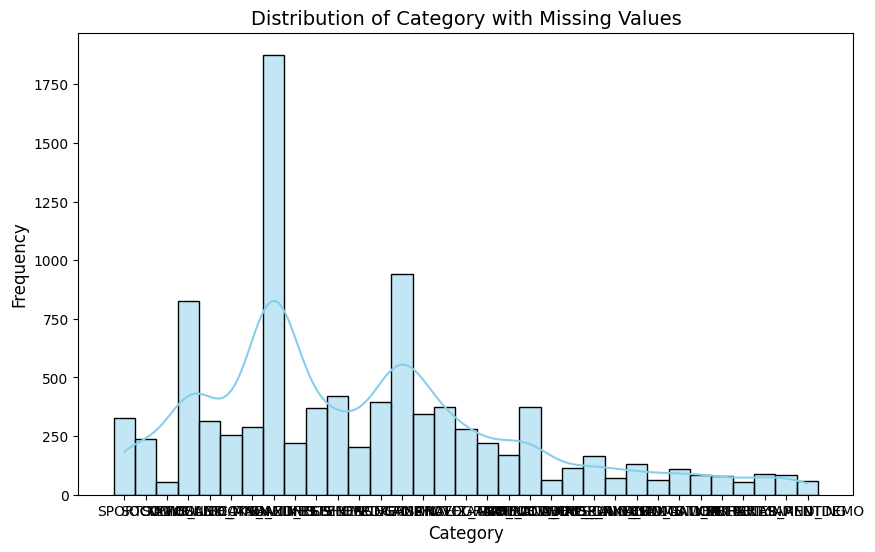

Skipping boxplot for non-numeric column: Category


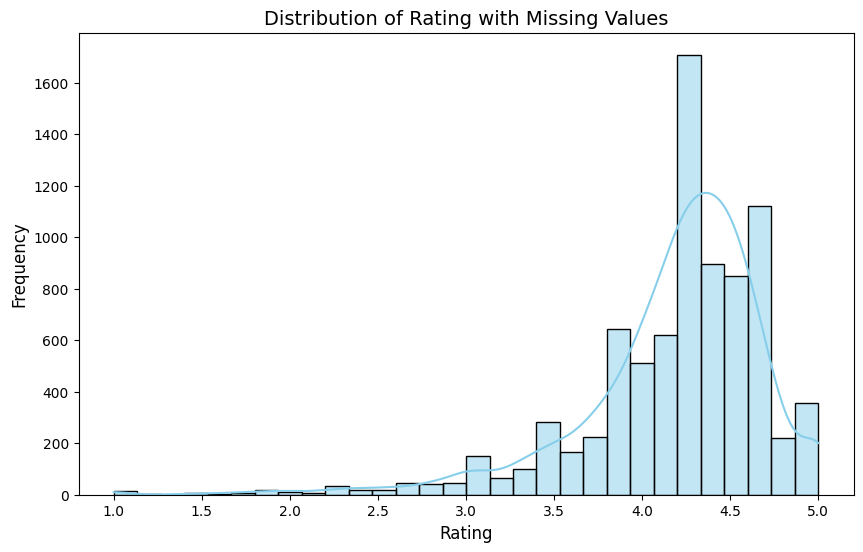

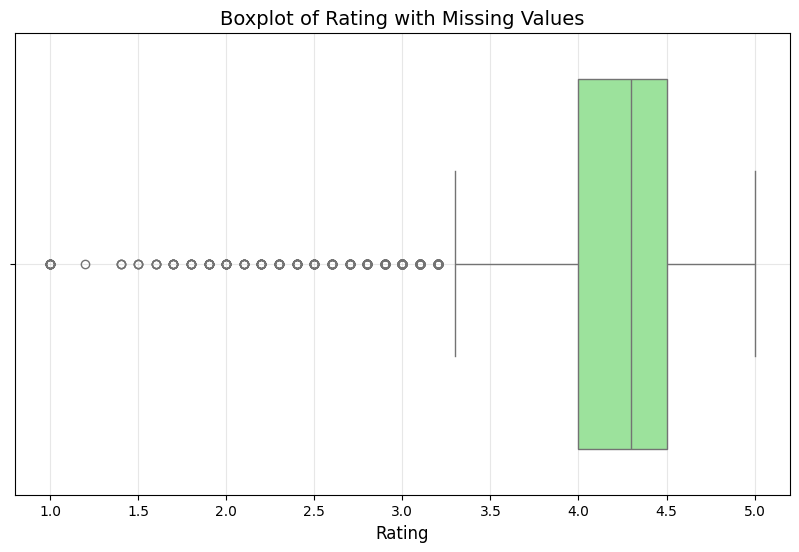

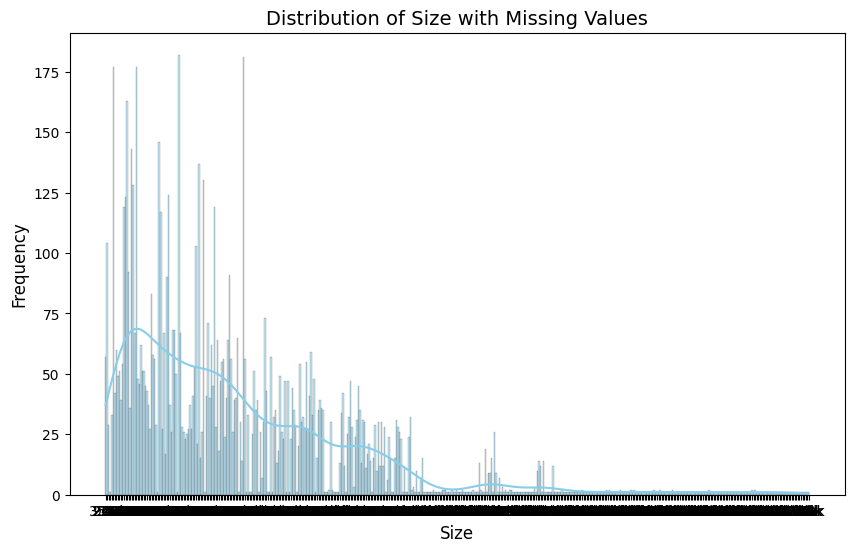

Skipping boxplot for non-numeric column: Size


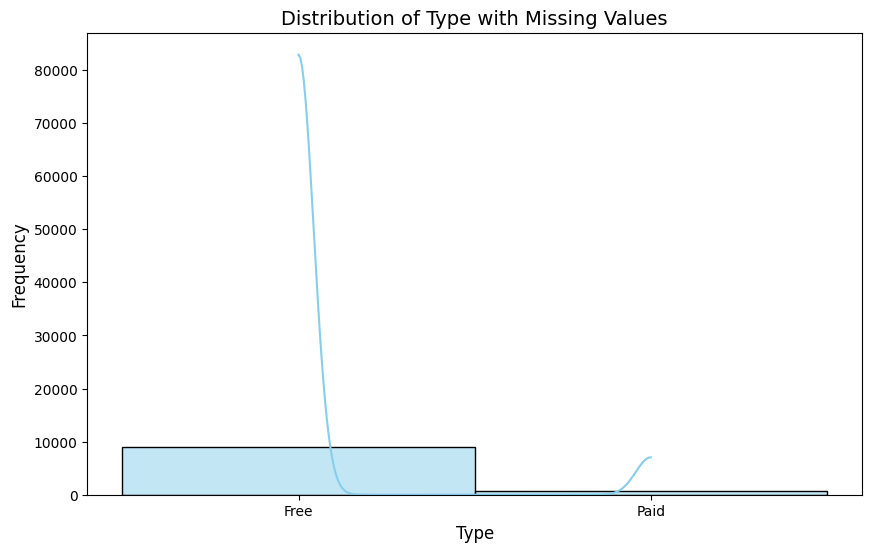

Skipping boxplot for non-numeric column: Type


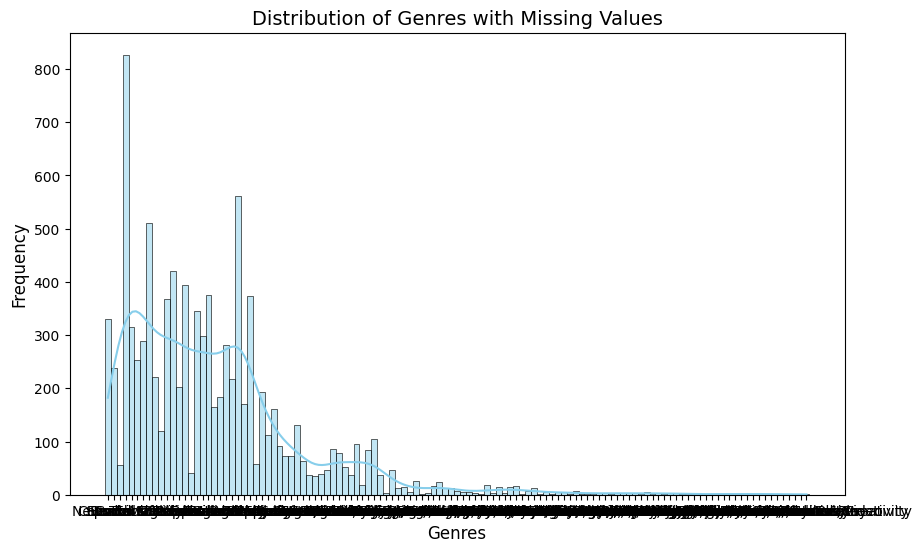

Skipping boxplot for non-numeric column: Genres


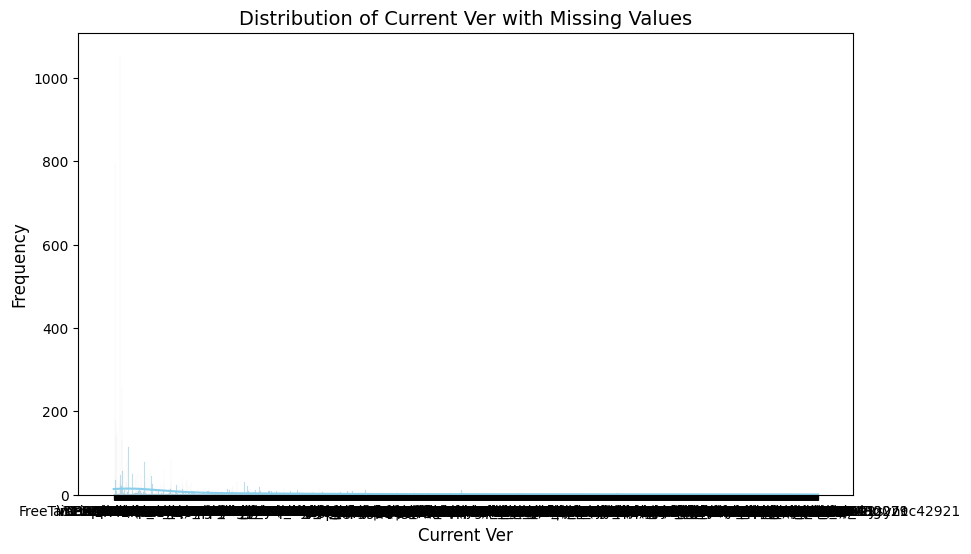

Skipping boxplot for non-numeric column: Current Ver


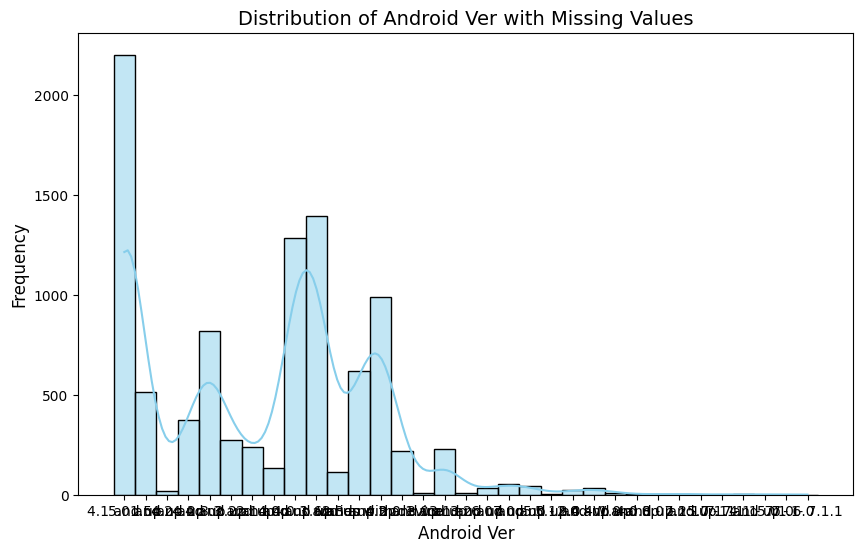

Skipping boxplot for non-numeric column: Android Ver


In [63]:
columns_missing = data.columns[data.isnull().any()]

for column in columns_missing:
    plt.figure(figsize = (10,6))
    sns.histplot(data[column],kde = True,color = 'skyblue',bins = 30)
    plt.title(f'Distribution of {column} with Missing Values',fontsize = 14)
    plt.xlabel(column,fontsize= 12)
    plt.ylabel('Frequency',fontsize = 12)
    plt.show()


    if data[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Boxplot of {column} with Missing Values', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()
    else:
        print(f"Skipping boxplot for non-numeric column: {column}")


In [64]:
data.fillna(data.select_dtypes(include=['number']).median(), inplace=True)
data.fillna(data.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   float64       
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   float64       
 6   Type            9660 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9660 non-null   object        
 12  Android Ver     9660 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.3+ MB


In [66]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [67]:
data.select_dtypes(include=['number']).corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.050218,0.034334,-0.018596
Reviews,0.050218,1.000000,0.625155,-0.007597
Installs,0.034334,0.625155,1.000000,-0.009407
Price,-0.018596,-0.007597,-0.009407,1.000000


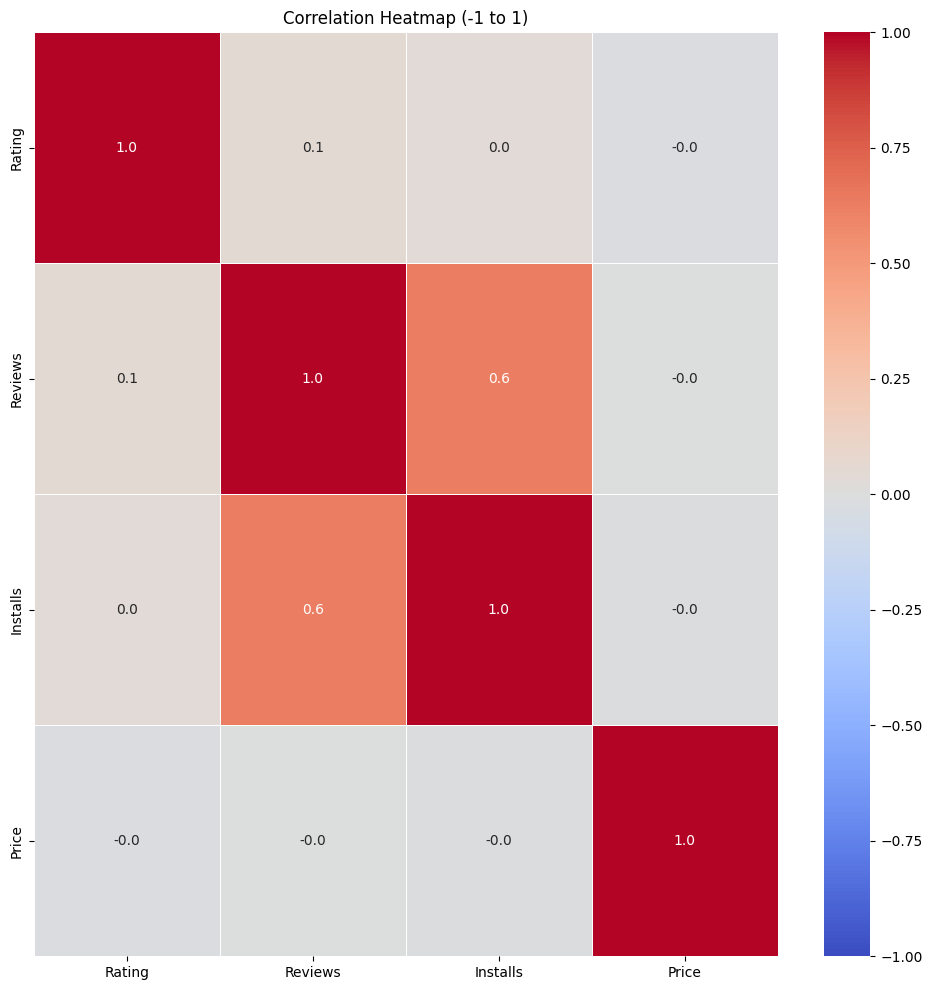

In [68]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    data.select_dtypes(include=['number']).corr(),  # Calculate correlation
    annot=True,                                    # Annotate the values in the cells
    linewidths=0.5,                                # Line width between cells
    fmt='.1f',                                     # Format the numbers
    ax=ax,                                         # Axes for the plot
    vmin=-1, vmax=1,                               # Set range for correlation
    cmap='coolwarm'                                # Color map for visualization
)
plt.title("Correlation Heatmap (-1 to 1)")         # Add a title
plt.show()

In [69]:
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

data.select_dtypes(include=['number']).describe()

,Rating,Reviews,Installs,Price
count,"9,660.00","9,660.00","9,660.00","9,660.00"
mean,4.19,"216,567.50","7,779,402.54",1.10
std,0.50,"1,831,304.37","53,757,306.76",16.85
min,1.00,0.00,0.00,0.00
25%,4.00,25.00,"1,000.00",0.00
50%,4.30,967.00,"100,000.00",0.00
75%,4.50,"29,354.75","1,000,000.00",0.00
max,5.00,"78,158,306.00","1,000,000,000.00",400.00


C:\Users\divis\AppData\Local\Temp\ipykernel_27280\153156487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Rating', order=rating_order, palette='viridis')


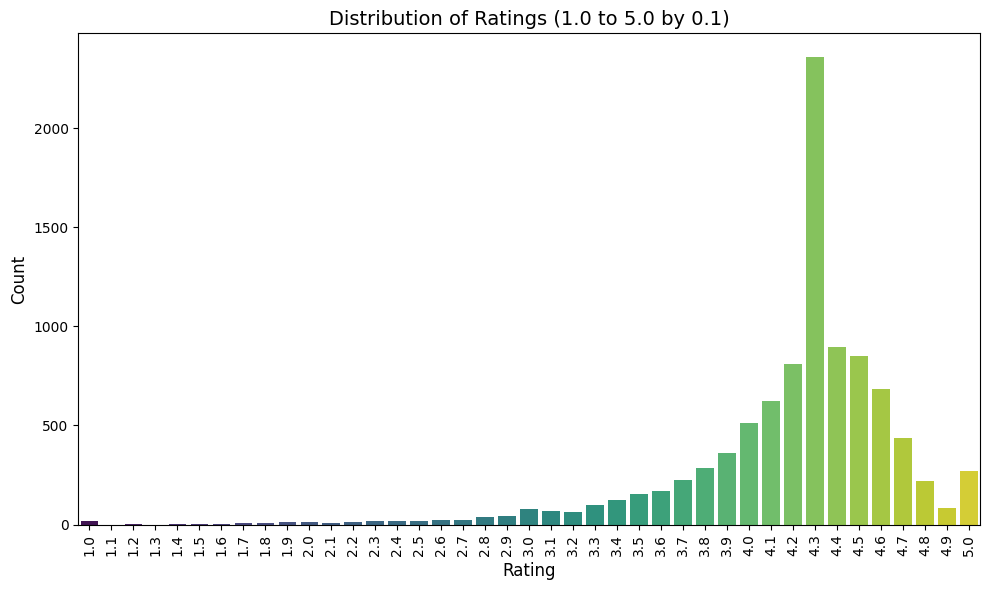

In [70]:
rating_order = np.round(np.arange(1.0, 5.1, 0.1), 1)  # Create a sequence from 1.0 to 5.0

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
sns.countplot(data=data, x='Rating', order=rating_order, palette='viridis')

# Customize the X-axis
plt.xticks(rotation=90)  # Rotate the labels 90 degrees for better visibility
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Ratings (1.0 to 5.0 by 0.1)", fontsize=14)

plt.tight_layout()  # Adjust the layout to make it neat
plt.show()

In [71]:
filtered_apps_rating_1 = data[data['Rating'] == 1.0]

# Calculate the median of Reviews and Installs
median_reviews_rating_1 = filtered_apps_rating_1['Reviews'].median()
median_installs_rating_1 = filtered_apps_rating_1['Installs'].median()

# Display the results
print("Median Reviews for Rating = 1.0 is ", median_reviews_rating_1)
print("Median Installs for Rating = 1.0 is ", median_installs_rating_1)

Median Reviews for Rating = 1.0 is  1.0
Median Installs for Rating = 1.0 is  100.0


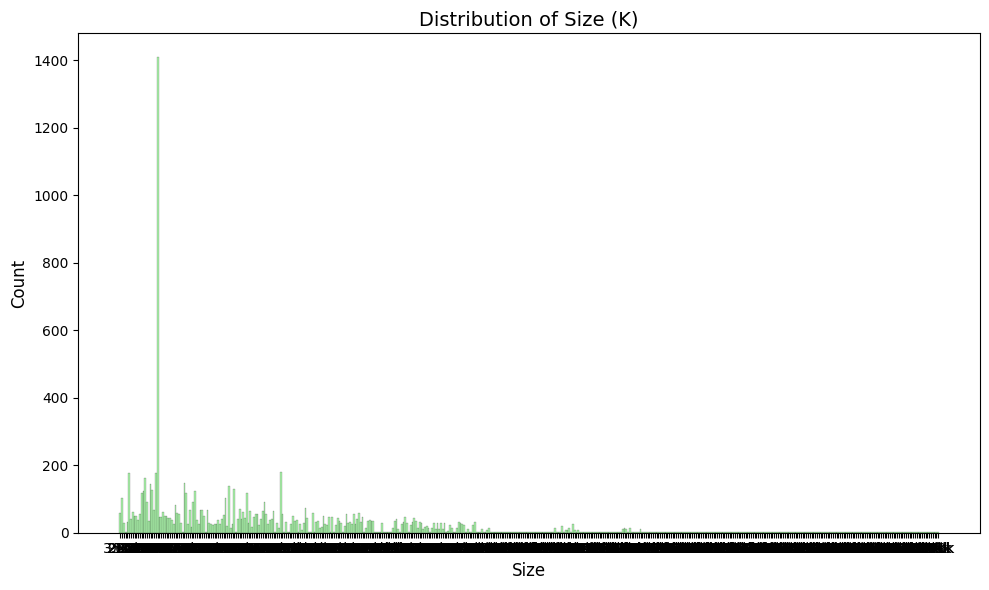

In [72]:
plt.figure(figsize=(10, 6))  # Adjust the size of the graph
sns.histplot(data['Size'], kde=False, color='lightgreen', bins=30)  # Set the desired number of bins

# Add labels and title
plt.xlabel("Size", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Size (K)", fontsize=14)

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

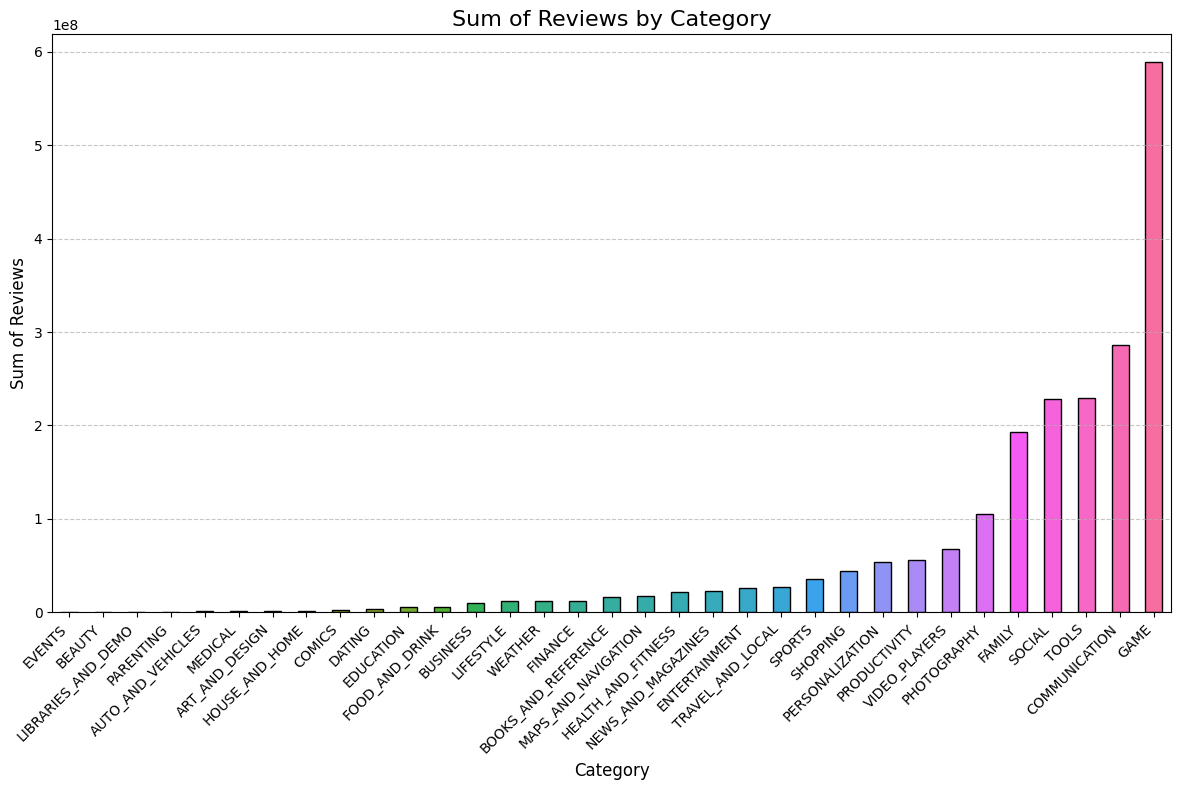

In [73]:
category_reviews_sum = (
    data.groupby('Category')['Reviews'].sum().sort_values()
)
color = sns.color_palette("husl", len(category_reviews_sum))
plt.figure(figsize = (12,8))
category_reviews_sum.plot(kind = 'bar', color = color,edgecolor = 'black')

plt.title('Sum of Reviews by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sum of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on the y-axis

plt.tight_layout()
plt.show()

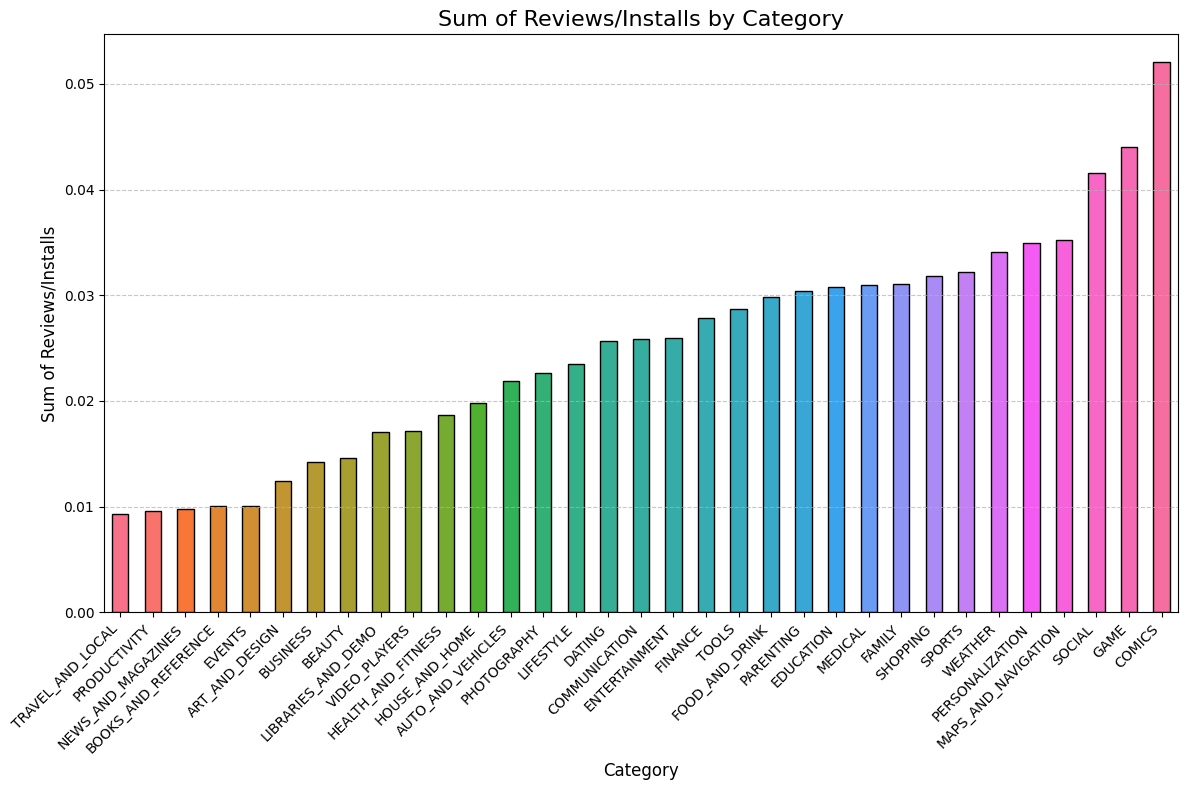

In [74]:
category_reviews_installs_ratio = (
    (data.groupby('Category')['Reviews'].sum()) / (data.groupby('Category')['Installs'].sum())
).sort_values()  # Sorting the values in ascending order

# Create a color palette with the same number of colors as the number of categories
colors = sns.color_palette("husl", len(category_reviews_installs_ratio))

# Create a bar chart
plt.figure(figsize=(12, 8))
category_reviews_installs_ratio.plot(kind='bar', color=colors, edgecolor='black')

# Set axis labels and title
plt.title('Sum of Reviews/Installs by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sum of Reviews/Installs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed grid lines on the y-axis

plt.tight_layout()
plt.show()


C:\Users\divis\AppData\Local\Temp\ipykernel_27280\131554916.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_type_installs['Free'].sort_values(ascending=False).index,
C:\Users\divis\AppData\Local\Temp\ipykernel_27280\131554916.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_type_installs['Paid'].sort_values(ascending=False).index,


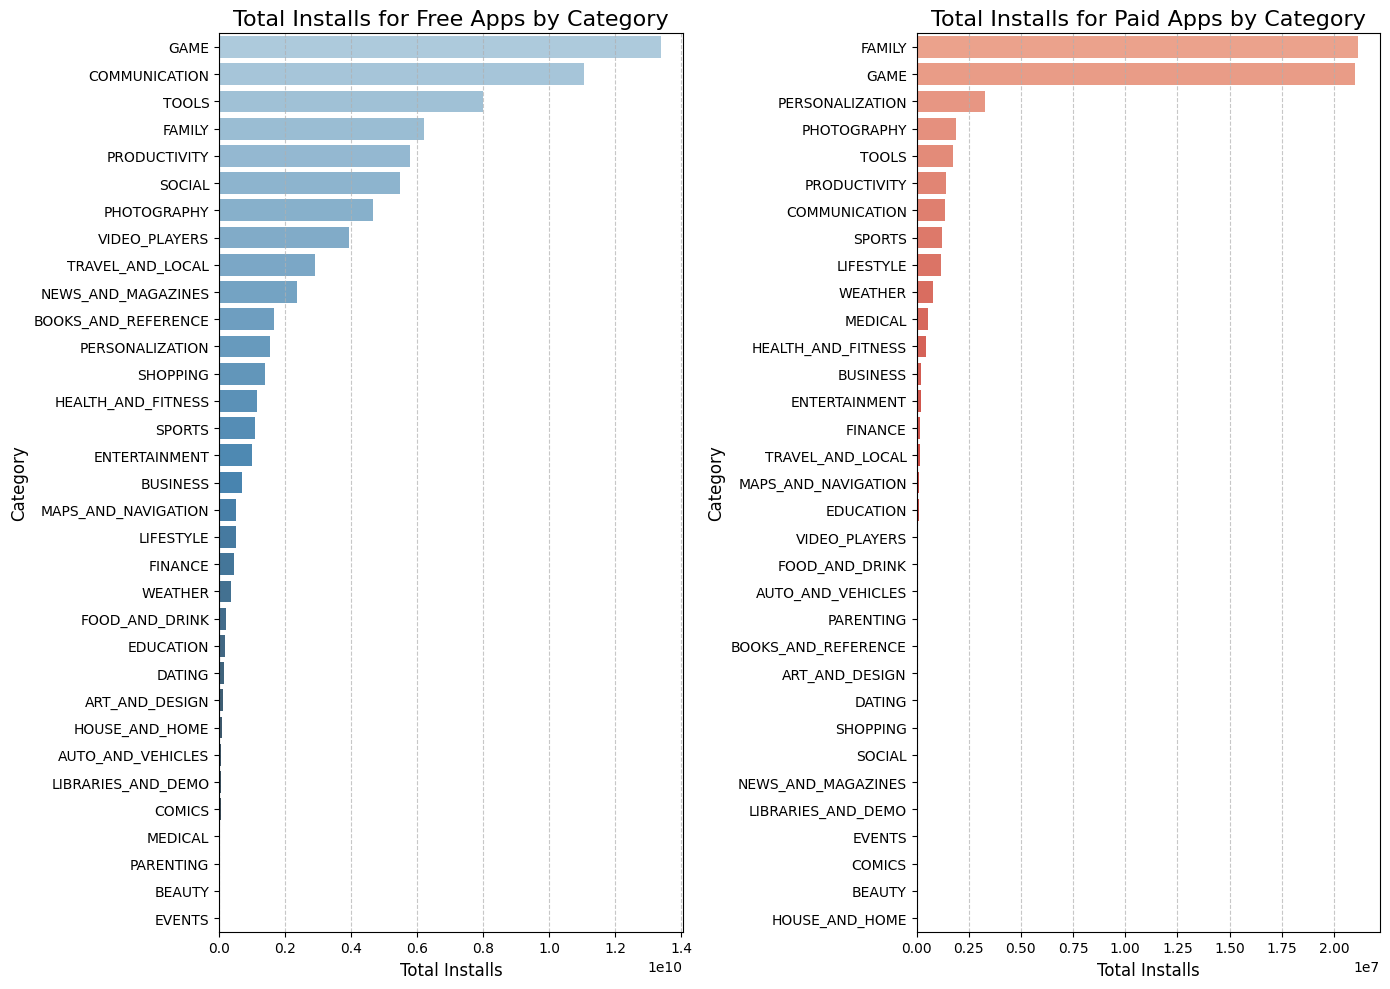

In [75]:
category_type_installs = data.groupby(['Category', 'Type'])['Installs'].sum().unstack().fillna(0)

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the plot for Type = 'free'
plt.subplot(1, 2, 1)  # First graph (row 1, column 2, graph 1)
sns.barplot(y=category_type_installs['Free'].sort_values(ascending=False).index,
            x=category_type_installs['Free'].sort_values(ascending=False).values,
            palette='Blues_d')
plt.title('Total Installs for Free Apps by Category', fontsize=16)
plt.ylabel('Category', fontsize=12)
plt.xlabel('Total Installs', fontsize=12)
plt.yticks(rotation=0, fontsize=10)  # Adjust the rotation of y-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create the plot for Type = 'paid'
plt.subplot(1, 2, 2)  # Second graph (row 1, column 2, graph 2)
sns.barplot(y=category_type_installs['Paid'].sort_values(ascending=False).index,
            x=category_type_installs['Paid'].sort_values(ascending=False).values,
            palette='Reds_d')
plt.title('Total Installs for Paid Apps by Category', fontsize=16)
plt.ylabel('Category', fontsize=12)
plt.xlabel('Total Installs', fontsize=12)
plt.yticks(rotation=0, fontsize=10)  # Adjust the rotation of y-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()